In [2]:
import requests
response = requests.get("https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt")
inventory_txt = response.text
# with open("inventory.txt","w",encoding = "utf-8") as inventory_file:
#     inventory_file.write(inventory_txt)

In [1]:
with open("inventory.txt","r",encoding = "utf-8") as file:
    print(file.read()[:137])

ACW00011604  17.1167  -61.7833 TMAX 1949 1949
ACW00011604  17.1167  -61.7833 TMIN 1949 1949
ACW00011604  17.1167  -61.7833 PRCP 1949 1949


In [3]:
print(inventory_txt[:137])

ACW00011604  17.1167  -61.7833 TMAX 1949 1949
ACW00011604  17.1167  -61.7833 TMIN 1949 1949
ACW00011604  17.1167  -61.7833 PRCP 1949 1949


In [4]:
from collections import namedtuple
Inventory = namedtuple("Inventory",
                        ["station","latitude","longitude","element","start","end"])
inventory = [Inventory(x[0:11],float(x[12:20]),float(x[21:30]),x[31:35],int(x[36:40]),int(x[41:45]))
            for x in inventory_txt.split("\n") if x.strip()]

In [5]:
for line in inventory[:3]:
    print(line)
print(inventory[0].station)

Inventory(station='ACW00011604', latitude=17.1167, longitude=-61.7833, element='TMAX', start=1949, end=1949)
Inventory(station='ACW00011604', latitude=17.1167, longitude=-61.7833, element='TMIN', start=1949, end=1949)
Inventory(station='ACW00011604', latitude=17.1167, longitude=-61.7833, element='PRCP', start=1949, end=1949)
ACW00011604


In [13]:
from pprint import pprint as pp
inventory_temps = [x for x in inventory if x.element in ["TMIN","TMAX"] and x.end >= 2015 and x.start < 1920]
# for x in inventory:
#     print(x)
pp(inventory_temps)

[Inventory(station='AG000060590', latitude=30.5667, longitude=2.8667, element='TMIN', start=1892, end=2023),
 Inventory(station='AGE00147708', latitude=36.72, longitude=4.05, element='TMAX', start=1886, end=2023),
 Inventory(station='AGE00147708', latitude=36.72, longitude=4.05, element='TMIN', start=1886, end=2023),
 Inventory(station='AGE00147716', latitude=35.1, longitude=-1.85, element='TMAX', start=1878, end=2023),
 Inventory(station='AGE00147716', latitude=35.1, longitude=-1.85, element='TMIN', start=1878, end=2023),
 Inventory(station='AGE00147718', latitude=34.85, longitude=5.72, element='TMAX', start=1880, end=2023),
 Inventory(station='AGE00147718', latitude=34.85, longitude=5.72, element='TMIN', start=1880, end=2023),
 Inventory(station='AGE00147719', latitude=33.7997, longitude=2.89, element='TMAX', start=1888, end=2023),
 Inventory(station='AGE00147719', latitude=33.7997, longitude=2.89, element='TMIN', start=1888, end=2023),
 Inventory(station='AJ000037735', latitude=40.7

 Inventory(station='USC00363758', latitude=41.4764, longitude=-75.1653, element='TMIN', start=1897, end=2017),
 Inventory(station='USC00364432', latitude=41.6769, longitude=-78.8036, element='TMAX', start=1894, end=2023),
 Inventory(station='USC00364432', latitude=41.6769, longitude=-78.8036, element='TMIN', start=1894, end=2023),
 Inventory(station='USC00366194', latitude=40.1483, longitude=-74.953, element='TMAX', start=1915, end=2023),
 Inventory(station='USC00366194', latitude=40.1483, longitude=-74.953, element='TMIN', start=1915, end=2023),
 Inventory(station='USC00366233', latitude=41.0172, longitude=-80.3614, element='TMAX', start=1894, end=2020),
 Inventory(station='USC00366233', latitude=41.0172, longitude=-80.3614, element='TMIN', start=1894, end=2020),
 Inventory(station='USC00366927', latitude=40.1208, longitude=-75.4878, element='TMAX', start=1893, end=2023),
 Inventory(station='USC00366927', latitude=40.1208, longitude=-75.4878, element='TMIN', start=1893, end=2023),
 In

In [16]:
mylatitude,mylongitude = 41.8803126697394, -87.65100198202353
inventory_temps.sort(key = lambda n:
                    abs(mylatitude - n.latitude) + abs(mylongitude - n.longitude))
pp(inventory_temps[:6])

[Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMAX', start=1893, end=2023),
 Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMIN', start=1893, end=2023),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMAX', start=1897, end=2023),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMIN', start=1897, end=2023),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMAX', start=1896, end=2023),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMIN', start=1896, end=2023)]


In [17]:
import requests
station_id = "USC00110338"
response = requests.get("https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/{}.dly".format(station_id))
weather = response.text
with open("weather_{}.txt".format(station_id),"w",encoding = "utf-8") as weather_file:
    weather_file.write(weather)
print(weather[:540])

USC00110338189301TMAX  -11  6  -44  6 -139  6  -83  6 -100  6  -83  6  -72  6  -83  6  -33  6 -178  6 -150  6 -128  6 -172  6 -200  6 -189  6 -150  6 -106  6  -61  6  -94  6  -33  6  -33  6  -33  6  -33  6    6  6  -33  6  -78  6  -33  6   44  6  -89 I6  -22  6    6  6
USC00110338189301TMIN  -50  6 -139  6 -250  6 -144  6 -178  6 -228  6 -144  6 -222  6 -178  6 -250  6 -200  6 -206  6 -267  6 -272  6 -294  6 -294  6 -311  6 -200  6 -233  6 -178  6 -156  6  -89  6 -200  6 -194  6 -194  6 -178  6 -200  6  -33 I6 -156  6 -139  6 -167  6



In [2]:
a = ("a","aa","aaa")
b = ("b","bb","bbb")
a + b

('a', 'aa', 'aaa', 'b', 'bb', 'bbb')

In [19]:
from parse_line import parse_line
print(parse_line(weather.split("\n")[0]))
parse_line(weather.split("\n")[1])

('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31)


('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31)

In [21]:
weather_data = [parse_line(x)
               for x in weather.split("\n") if x]
print(len(weather_data))
pp(weather_data)

10915
[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 1, 'PRCP', 8.9, 0.0, 1.1, 31),
 ('USC00110338', 1893, 1, 'SNOW', 10.2, 0.0, 1.0, 31),
 ('USC00110338', 1893, 1, 'WT16', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1893, 1, 'WT18', 0.1, 0.1, 0.1, 11),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 2, 'PRCP', 15.0, 0.0, 2.0, 28),
 ('USC00110338', 1893, 2, 'SNOW', 12.7, 0.0, 0.6, 28),
 ('USC00110338', 1893, 2, 'WT16', 0.1, 0.1, 0.1, 5),
 ('USC00110338', 1893, 2, 'WT18', 0.1, 0.1, 0.1, 3),
 ('USC00110338', 1893, 3, 'TMAX', 20.6, -7.2, 5.6, 30),
 ('USC00110338', 1893, 3, 'TMIN', 3.3, -13.3, -4.6, 31),
 ('USC00110338', 1893, 3, 'PRCP', 24.4, 0.0, 2.2, 31),
 ('USC00110338', 1893, 3, 'SNOW', 5.1, 0.0, 0.2, 31),
 ('USC00110338', 1893, 3, 'WT16', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1893, 4, 'TMAX', 28.9, 3.3, 13.5, 30),


 ('USC00110338', 1915, 12, 'WT09', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1916, 1, 'TMAX', 15.0, -12.2, 1.7, 31),
 ('USC00110338', 1916, 1, 'TMIN', 8.3, -23.9, -8.1, 31),
 ('USC00110338', 1916, 1, 'TOBS', 9.4, -22.8, -3.6, 31),
 ('USC00110338', 1916, 1, 'PRCP', 53.3, 0.0, 3.9, 31),
 ('USC00110338', 1916, 1, 'SNOW', 10.2, 0.0, 0.8, 31),
 ('USC00110338', 1916, 1, 'SNWD', 10.2, 0.0, 0.6, 16),
 ('USC00110338', 1916, 1, 'WT03', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1916, 1, 'WT04', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1916, 1, 'WT11', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1916, 2, 'TMAX', 10.0, -10.0, -1.1, 29),
 ('USC00110338', 1916, 2, 'TMIN', -1.1, -22.2, -10.2, 29),
 ('USC00110338', 1916, 2, 'TOBS', 3.9, -18.9, -4.9, 29),
 ('USC00110338', 1916, 2, 'PRCP', 10.2, 0.0, 0.7, 29),
 ('USC00110338', 1916, 2, 'SNOW', 7.6, 0.0, 0.4, 29),
 ('USC00110338', 1916, 2, 'SNWD', 7.6, 0.0, 4.2, 20),
 ('USC00110338', 1916, 2, 'WT03', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1916, 3, 'TMAX', 20.0, -5.0, 5.8, 31),
 ('US

 ('USC00110338', 1950, 11, 'TMIN', 15.0, -20.6, -4.8, 30),
 ('USC00110338', 1950, 11, 'TOBS', 12.8, -16.7, -0.3, 29),
 ('USC00110338', 1950, 11, 'PRCP', 8.6, 0.0, 1.0, 30),
 ('USC00110338', 1950, 11, 'SNOW', 4.1, 0.0, 0.2, 30),
 ('USC00110338', 1950, 11, 'SNWD', 5.1, 0.0, 0.8, 30),
 ('USC00110338', 1950, 11, 'WT01', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1950, 11, 'WT03', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1950, 11, 'WT11', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1950, 11, 'WT14', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1950, 12, 'TMAX', 8.3, -10.0, -3.1, 31),
 ('USC00110338', 1950, 12, 'TMIN', 0.0, -31.1, -13.6, 31),
 ('USC00110338', 1950, 12, 'TOBS', 1.7, -19.4, -7.9, 29),
 ('USC00110338', 1950, 12, 'PRCP', 11.9, 0.0, 2.1, 31),
 ('USC00110338', 1950, 12, 'SNOW', 9.7, 0.0, 1.7, 31),
 ('USC00110338', 1950, 12, 'SNWD', 30.5, 0.0, 18.9, 31),
 ('USC00110338', 1950, 12, 'WT01', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1950, 12, 'WT03', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1951, 1, 'TMAX', 10.0, -17.8, -1.

 ('USC00110338', 1987, 12, 'TOBS', 11.7, -14.4, -1.2, 31),
 ('USC00110338', 1987, 12, 'PRCP', 26.2, 0.0, 3.9, 31),
 ('USC00110338', 1987, 12, 'SNOW', 20.3, 0.0, 1.5, 31),
 ('USC00110338', 1987, 12, 'SNWD', 20.3, 0.0, 5.7, 31),
 ('USC00110338', 1987, 12, 'WT03', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1987, 12, 'WT05', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1987, 12, 'WT11', 0.1, 0.1, 0.1, 1),
 ('USC00110338', 1988, 1, 'TMAX', 12.2, -17.8, -2.0, 31),
 ('USC00110338', 1988, 1, 'TMIN', 6.7, -27.2, -12.3, 31),
 ('USC00110338', 1988, 1, 'TOBS', 11.1, -23.9, -7.0, 31),
 ('USC00110338', 1988, 1, 'PRCP', 10.9, 0.0, 1.3, 31),
 ('USC00110338', 1988, 1, 'SNOW', 5.1, 0.0, 0.5, 31),
 ('USC00110338', 1988, 1, 'SNWD', 15.2, 0.0, 8.3, 31),
 ('USC00110338', 1988, 2, 'TMAX', 11.7, -12.8, -0.1, 29),
 ('USC00110338', 1988, 2, 'TMIN', -2.8, -18.9, -10.8, 29),
 ('USC00110338', 1988, 2, 'TOBS', 2.2, -18.9, -6.5, 29),
 ('USC00110338', 1988, 2, 'PRCP', 7.6, 0.0, 0.8, 29),
 ('USC00110338', 1988, 2, 'SNOW', 9.1, 0.0, 1

In [24]:
import sqlite3
conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()
create_weather = """CREATE TABLE weather(
    "id" text NOT NULL,
    "year" integer NOT NULL,
    "month" integer NOT NULL,
    "element" text NOT NULL,
    "max" real,
    "min" real,
    "mean" real,
    "count" integer)"""
#cursor.execute(create_weather)
conn.commit()

for record in weather_data:
    cursor.execute("""insert into weather(
    id,year,month,element,max,min,mean,count) values(?,?,?,?,?,?,?,?)""",record)
conn.commit()

In [27]:
cursor.execute("""select * from weather
               where element = 'TMAX' order by year,month""")
tmax_data = cursor.fetchall()
pp(tmax_data[:5])

[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 3, 'TMAX', 20.6, -7.2, 5.6, 30),
 ('USC00110338', 1893, 4, 'TMAX', 28.9, 3.3, 13.5, 30),
 ('USC00110338', 1893, 5, 'TMAX', 30.6, 7.2, 19.2, 31)]


In [28]:
tmax_data = [x for x in weather_data if x[3] == "TMAX"]
tmin_data = [x for x in weather_data if x[3] == "TMIN"]
pp(tmin_data[:5])

[('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 3, 'TMIN', 3.3, -13.3, -4.6, 31),
 ('USC00110338', 1893, 4, 'TMIN', 12.2, -5.6, 2.2, 30),
 ('USC00110338', 1893, 5, 'TMIN', 14.4, -0.6, 5.7, 31)]


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

tmax_df = pd.DataFrame(tmax_data,columns = ["Station","Year","Month",
                                           "Element","Max","Min","Mean","Days"])
tmin_df = pd.DataFrame(tmin_data,columns = ["Station","Year","Month",
                                           "Element","Max","Min","Mean","Days"])
display(tmax_df)
tmin_df

,Station,Year,Month,Element,Max,Min,Mean,Days
0,USC00110338,1893,1,TMAX,4.4,-20.0,-7.8,31
1,USC00110338,1893,2,TMAX,5.6,-17.2,-0.9,27
2,USC00110338,1893,3,TMAX,20.6,-7.2,5.6,30
3,USC00110338,1893,4,TMAX,28.9,3.3,13.5,30
4,USC00110338,1893,5,TMAX,30.6,7.2,19.2,31
...,...,...,...,...,...,...,...,...
1516,USC00110338,2023,3,TMAX,13.9,-5.0,7.1,31
1517,USC00110338,2023,4,TMAX,27.8,3.9,16.4,30
1518,USC00110338,2023,5,TMAX,30.6,7.2,22.1,31
1519,USC00110338,2023,6,TMAX,32.8,14.4,26.6,30


,Station,Year,Month,Element,Max,Min,Mean,Days
0,USC00110338,1893,1,TMIN,-3.3,-31.1,-19.2,31
1,USC00110338,1893,2,TMIN,0.6,-26.1,-11.7,27
2,USC00110338,1893,3,TMIN,3.3,-13.3,-4.6,31
3,USC00110338,1893,4,TMIN,12.2,-5.6,2.2,30
4,USC00110338,1893,5,TMIN,14.4,-0.6,5.7,31
...,...,...,...,...,...,...,...,...
1524,USC00110338,2023,3,TMIN,3.9,-11.7,-2.0,31
1525,USC00110338,2023,4,TMIN,12.2,-2.2,2.8,30
1526,USC00110338,2023,5,TMIN,15.0,1.7,8.9,31
1527,USC00110338,2023,6,TMIN,18.9,7.8,13.9,30


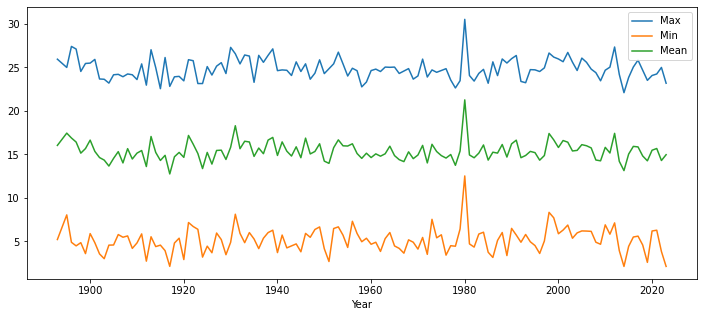

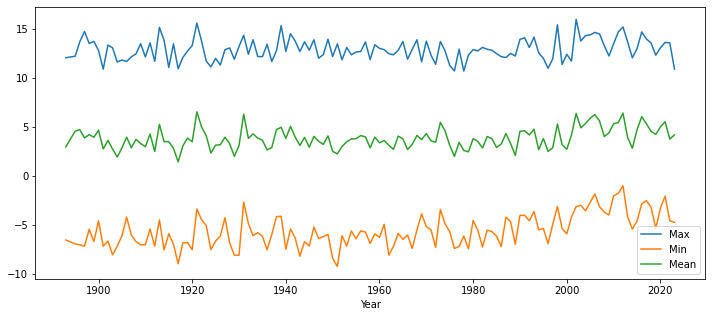

In [39]:
tmax_df[["Year","Max","Min","Mean"]].groupby("Year").mean().plot(kind = "line",figsize = (12,5))
tmin_df[["Year","Max","Min","Mean"]].groupby("Year").mean().plot(kind = "line",figsize = (12,5))

plt.show()